<a href="https://colab.research.google.com/github/hollowspaces/mini-project-cv/blob/master/KELOMPOK_7_Bombe_Image_Classification_Alien_vs_Predator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification (Alien vs Predator from Alien Movies)
Kelompok 7 - Bombe Class

1. Ericx Cahya Pratama
2. Okta Maria Gea
3. Rifli Yanto
4. Salma Natasya Azzahra
5. Sri Puji Astuti
6. Vanesa Bintang Pertiwi

# Latar Belakang

Di era pandemi ini, masyarakat banyak menghabiskan waktu untuk melakukan kegiatan *indoor* (dalam ruangan) untuk membatasi kerumunan di luar rumah. Demi menghilangkan rasa bosan karena aktivitas yang dibatasi, maka sebagian besar masyarakat memilih untuk menonton sebuah film. Saat ini, film-film yang ada dapat ditonton di berbagai platform, terutama melalui platform online. Ada berbagai jenis maupun genre film yang ditawarkan oleh tempat produksi film. Salah satunya adalah film dengan tema alien yang memiliki berbagai konflik di dalamnya.

Contoh film dengan tema alien yaitu film berjudul "Alien". Film Alien menceritakan para kru kapal luar angkasa Nostromo menghadapi makhluk mengerikan yang secara tidak sengaja mereka bawa ke kapal. Makhluk tersebut bernama Xenomorph dan mengeluarkan asam korosif ketika ada yang mencoba melukainya. Film Alien ini memiliki beberapa sequel, di antaranya Alien, the predator, alien vs predator, alien 3, alien:resurrection, alien:covenant. Dimana setiap film menceritakan kelanjutan perjuangan manusia melawan para aliens dan juga predator, hingga pada suatu saat predator ikut membantu perjuangan manusia dalam mempertahankan hak dan kekuasaannya. Sampai saat ini sequel ini masih berlanjut. Dengan panjangnya sequel yang disajikan maka banyak dari penonton masih mengalami ke bingungan dalam menganalisis setiap karakter yang di tampilkan,terutama untuk menganalisis perbedaan antara alien dan juga predator. Maka dari itu kami berinisiatif untuk membuat clasifikasi antara alien dan juga pedator. Dengan harapan bisa memberikan gambaran perbedaan dari kedua kerakter tersebut secara detail.


# Problem Scoping


> **What :**
Mini project yang akan dibuat yaitu Image Classification.
Gambar akan diklasifikasikan menjadi 2 kelas yaitu kelas alien dan kelas predator.

> **Why :**
Alasan kami membuat klasifikasi alien dan predator karena sering terjadi perdebatan setelah menonton film yang memiliki karakter alien dan predator, sehingga mengakibatkan perpecahan opini diantara penonton.

> **Where :**
Project ini dapat diimplementasikan untuk mengidentifikasi film berjudul Alien maupun sequel-sequel film tersebut.

> **Who :**
Masyarakat yang memiliki ketertarikan untuk menonton film bergenre Alien.

# Data Acquisition

Dataset alien dan predator didapatkan melalui situs Kaggle, dan kami upload raw datasetnya ke dalam github. Data dipisahkan menjadi data train dan juga data validation. Terdapat 347 data train untuk alien dan predator, serta 100 data validation alien dan predator.

#### Build Image Dataset

Download train dataset

In [ ]:
!wget --no-check-certificate \
    https://github.com/hollowspaces/Datasets/blob/master/dataset-mini-project-image-classification-alien-vs-predator/train.zip?raw=true \
    -O /tmp/train.zip

--2022-03-25 23:31:17--  https://github.com/hollowspaces/Datasets/blob/master/dataset-mini-project-image-classification-alien-vs-predator/train.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/hollowspaces/Datasets/raw/master/dataset-mini-project-image-classification-alien-vs-predator/train.zip [following]
--2022-03-25 23:31:17--  https://github.com/hollowspaces/Datasets/raw/master/dataset-mini-project-image-classification-alien-vs-predator/train.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hollowspaces/Datasets/master/dataset-mini-project-image-classification-alien-vs-predator/train.zip [following]
--2022-03-25 23:31:18--  https://raw.githubusercontent.com/hollowspaces/Datasets/master/dataset-mini-project-image-classification-

Download validation dataset

In [ ]:
!wget --no-check-certificate \
    https://github.com/hollowspaces/Datasets/blob/master/dataset-mini-project-image-classification-alien-vs-predator/valid.zip?raw=true \
    -O /tmp/valid.zip

--2022-03-25 23:31:29--  https://github.com/hollowspaces/Datasets/blob/master/dataset-mini-project-image-classification-alien-vs-predator/valid.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/hollowspaces/Datasets/raw/master/dataset-mini-project-image-classification-alien-vs-predator/valid.zip [following]
--2022-03-25 23:31:29--  https://github.com/hollowspaces/Datasets/raw/master/dataset-mini-project-image-classification-alien-vs-predator/valid.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hollowspaces/Datasets/master/dataset-mini-project-image-classification-alien-vs-predator/valid.zip [following]
--2022-03-25 23:31:29--  https://raw.githubusercontent.com/hollowspaces/Datasets/master/dataset-mini-project-image-classification-

Isi dari .zip akan diextract ke directory /tmp/train, dimana setiap folder berisi subfolder dengan nama alien dan predator.

In [ ]:
#Import Library OS/Zipfile
import os
import zipfile

In [ ]:
local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

In [ ]:
local_zip = '/tmp/valid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')

zip_ref.close()

Menentukan sub direktori

In [ ]:
# Directory our train alien and predator pictures
train_alien_dir = os.path.join('/tmp/train/alien')
train_predator_dir = os.path.join('/tmp/train/predator')

# Directory our validation alien and predator pictures
valid_alien_dir = os.path.join('/tmp/validation/alien')
valid_predator_dir = os.path.join('/tmp/validation/predator')

In [ ]:
# Melihat seperti apa nama file di training directory alien dan predator :
train_alien_names = os.listdir(train_alien_dir)
print(train_alien_dir[:10])

train_predator_names = os.listdir(train_predator_dir)
print(train_predator_dir[:10])

validation_alien_names = os.listdir(valid_alien_dir)
print(validation_alien_names[:10])

validation_predator_names = os.listdir(valid_predator_dir)
print(validation_predator_names[:10])

/tmp/train
/tmp/train
['43.jpg', '96.jpg', '95.jpg', '70.jpg', '2.jpg', '71.jpg', '23.jpg', '61.jpg', '37.jpg', '94.jpg']
['43.jpg', '96.jpg', '95.jpg', '70.jpg', '2.jpg', '71.jpg', '23.jpg', '61.jpg', '37.jpg', '94.jpg']


In [ ]:
print('total training alien images:', len(os.listdir(train_alien_dir)))
print('total training predator images:', len(os.listdir(train_predator_dir)))
print('total validation alien images:', len(os.listdir(valid_alien_dir)))
print('total validation predator images:', len(os.listdir(valid_predator_dir)))

total training alien images: 347
total training predator images: 347
total validation alien images: 100
total validation predator images: 100


Melihat beberapa pictures untuk mendapatkan sense lebih baik Seperti apa. Hal pertama yang dilakukan adalah melakukan konfigurasi matplot parameters:

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 5
ncols = 5

# Index for iterating over images
pic_index = 0

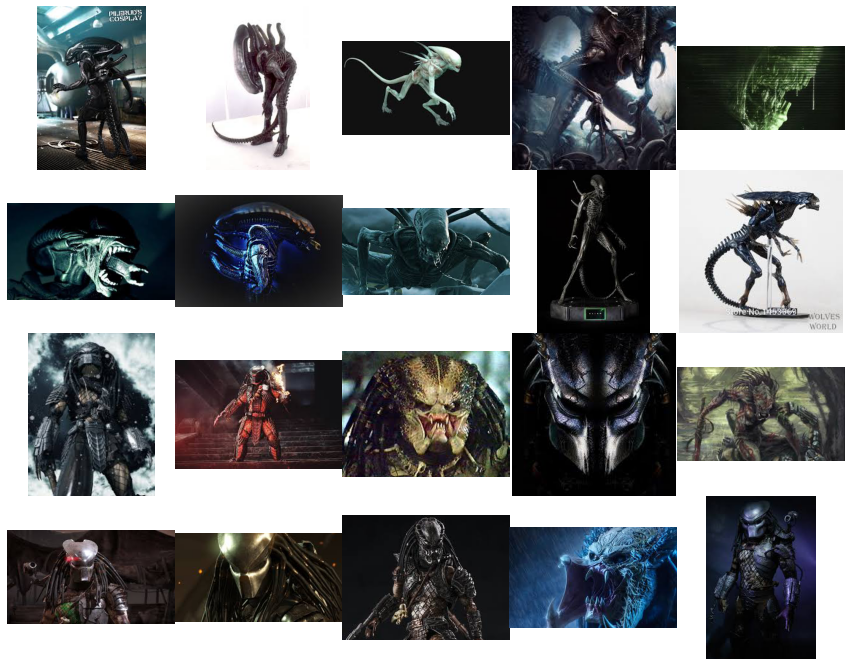

In [ ]:
# Set up matplotlib fig, and size
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)
plt.subplots_adjust(wspace=0, hspace=0)

pic_index += 25
next_alien_pic = [os.path.join(train_alien_dir, fname) 
                for fname in train_alien_names[pic_index-10:pic_index]]
next_predator_pic = [os.path.join(train_predator_dir, fname) 
                for fname in train_predator_names[pic_index-10:pic_index]]

for i, img_path in enumerate(next_alien_pic + next_predator_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Exploration


Pada data exploration dilakukan pemrosesan data untuk membuat augmentasi dataset dan membuat target size gambar. Augmentasi data adalah strategi untuk menambahkan keberagaman data yang tersedia untuk training model, tanpa harus mengumpulkan data yang baru. Teknik ini seperti mengatur padding, cropping, shifting, flipping, dan sebagainya.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


#### Data Preprocessing

Augmentasi dilakukan dengan mengatur ZCA epsilon, rotation range, lebar dan tinggi shift range, shear range, zoom, fill mode, dan flipping. Pada proses ini dilakukan normalisasi dengan batch normalization. Target size gambar yang ditentukan yakni sebesar 224 x 224.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet, preprocess_input

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      zca_epsilon = 1e-06,
      rotation_range = 30,
      width_shift_range = 0.1,
      height_shift_range = 0.1,
      shear_range = 0.1,
      zoom_range = 0.1,
      fill_mode = "nearest",
      horizontal_flip = True,
      vertical_flip = True,
      preprocessing_function = preprocess_input,
).flow_from_directory(
      '/tmp/train/',
      classes = ['alien', 'predator'],
      batch_size = 8,
      target_size = (224,224),
      subset="training"
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range = 30,
      width_shift_range = 0.1,
      height_shift_range = 0.1,
      shear_range = 0.1,
      zoom_range = 0.1,
      fill_mode = "nearest",
      horizontal_flip = True,
      vertical_flip = True,
      preprocessing_function = preprocess_input,
).flow_from_directory(
      '/tmp/validation/',
      classes = ['alien', 'predator'],
      batch_size = 8,
      target_size = (224,224),
      shuffle = True
)

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


# Modelling

Pada modelling dilakukan proses pemilihan algoritma dan pembuatan model arsitektur untuk image classification. Modelling dibuat menggunakan algoritma CNN (Convolutional Neural Network) dengan base arsitektur MobileNet. MobileNet merupakan sebuah model arsitektur CNN yang didesain efisien dengan 2 set
hyper-parameters untuk membangun model yang sangat kecil dan latensi rendah yang akan dengan mudah diimplementasikan sesuai kebutuhan mobile dan embedded applications. MobileNet dibuat berdasarkan depthwise separable convolutions untuk mengurangi komputasi di layer awaL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

base_model = MobileNet(
      include_top=False,
      weights='imagenet',
      input_shape = (224,224,3)
)

In [ ]:
base_model.trainable=False

Membuat arsitektur model dengan CNN.

In [ ]:
model = Sequential([
      base_model,
      MaxPooling2D(3, 2),
      Flatten(),
      Dense(128, activation='relu'),
      Dense(256, activation='relu'),
      Dense(2, activation='softmax')
])

In [ ]:
# Visualisasi Model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 1024)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               1179776   
                                                                 
 dense_19 (Dense)            (None, 256)               33024     
                                                                 
 dense_20 (Dense)            (None, 2)                

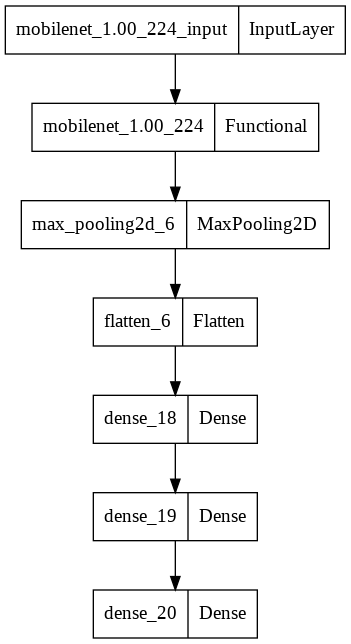

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [ ]:
# Mengcompile model
model.compile(
      optimizer=tf.keras.optimizers.Adam(
          learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.99),
      loss='categorical_crossentropy', 
      metrics=["accuracy"]
)

In [ ]:
early_stopping = EarlyStopping(
      patience = 5, restore_best_weights=True)

reduce_LR = ReduceLROnPlateau(
    monitor='val_accuracy', verbose = 2, factor = 0.5, min_lr = 0.00001)

model_check = ModelCheckpoint(
    'model.hdf5', monitor ='val_loss', verbose = 1)
callback=[early_stopping, reduce_LR, model_check]

#### Training Model

In [ ]:
import time
start_time = time.time()

history = model.fit(
    train_datagen,
    validation_data = validation_datagen,
    epochs = 50,
    batch_size = 8,
    steps_per_epoch = 10,
    validation_steps=len(validation_datagen) // 8,
    callbacks = callback, 
    verbose = 1)

print(f"Running time: --- {time.time() - start_time}%s seconds ---")

Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 1.4508 - accuracy: 0.5625
Epoch 1: saving model to model.hdf5
10/10 [==============================] - 7s 571ms/step - loss: 1.4508 - accuracy: 0.5625 - val_loss: 1.3989 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 0.9638 - accuracy: 0.6923
Epoch 2: saving model to model.hdf5
10/10 [==============================] - 5s 494ms/step - loss: 0.9638 - accuracy: 0.6923 - val_loss: 0.3813 - val_accuracy: 0.7917 - lr: 1.0000e-04
Epoch 3/50
10/10 [==============================] - ETA: 0s - loss: 0.7853 - accuracy: 0.7375
Epoch 3: saving model to model.hdf5
10/10 [==============================] - 5s 501ms/step - loss: 0.7853 - accuracy: 0.7375 - val_loss: 0.6669 - val_accuracy: 0.7083 - lr: 1.0000e-04
Epoch 4/50
10/10 [==============================] - ETA: 0s - loss: 0.4735 - accuracy: 0.7564
Epoch 4: saving model to model.hdf5
10/10 [=============================

# Evaluation

In [ ]:
model.evaluate(validation_datagen)

25/25 [==============================] - 9s 345ms/step - loss: 0.2747 - accuracy: 0.8900


[0.27469712495803833, 0.8899999856948853]

<Figure size 432x288 with 0 Axes>

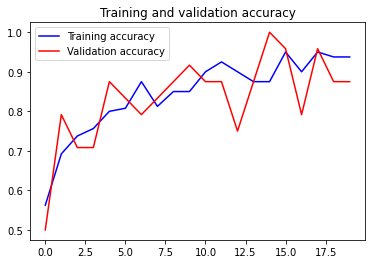

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Membuat grafik akurasi data train
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

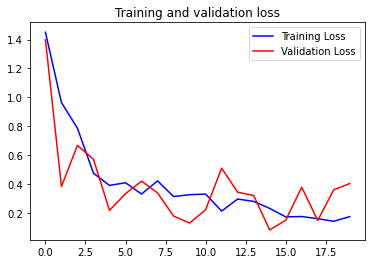

In [ ]:
# Membuat grafik akurasi data validation
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('model.h5')